In [2]:
pip install pandas

In [3]:
pip install ipykernel -U --force-reinstall

  Using cached ipykernel-6.29.5-py3-none-any.whl.metadata (6.3 kB)
  Using cached comm-0.2.2-py3-none-any.whl.metadata (3.7 kB)
  Using cached debugpy-1.8.6-cp312-cp312-win_amd64.whl.metadata (1.1 kB)
  Using cached ipython-8.28.0-py3-none-any.whl.metadata (5.0 kB)
  Using cached jupyter_client-8.6.3-py3-none-any.whl.metadata (8.3 kB)
  Using cached jupyter_core-5.7.2-py3-none-any.whl.metadata (3.4 kB)
  Using cached matplotlib_inline-0.1.7-py3-none-any.whl.metadata (3.9 kB)
  Using cached nest_asyncio-1.6.0-py3-none-any.whl.metadata (2.8 kB)
  Using cached packaging-24.1-py3-none-any.whl.metadata (3.2 kB)
  Using cached psutil-6.0.0-cp37-abi3-win_amd64.whl.metadata (22 kB)
  Using cached pyzmq-26.2.0-cp312-cp312-win_amd64.whl.metadata (6.2 kB)
  Using cached tornado-6.4.1-cp38-abi3-win_amd64.whl.metadata (2.6 kB)
  Using cached traitlets-5.14.3-py3-none-any.whl.metadata (10 kB)
  Using cached decorator-5.1.1-py3-none-any.whl.metadata (4.0 kB)
  Using cached jedi-0.19.1-py2.py3-none-an

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.


In [2]:
import pandas as pd

In [20]:
df=pd.read_csv("data.csv")
df

,inventory_id,film_id,title,rental_duration,rental_rate,length,replacement_cost,rating,category,language,store_id,rental_id,rental_date,customer_id,return_date,amount,active
0,3419,749,Rules Human,6,4.99,153,19.99,R,Horror,English,1,1520,2005-06-15 23:57:20,341,2005-06-24 23:46:20,7.99,1
1,2512,552,Majestic Floats,5,0.99,130,15.99,PG,Documentary,English,2,1778,2005-06-16 18:54:48,341,2005-06-22 16:08:48,1.99,1
2,2507,551,Maiden Home,3,4.99,138,9.99,PG,New,English,1,1849,2005-06-17 00:13:19,341,2005-06-23 18:37:19,7.99,1
3,2047,445,Hyde Doctor,5,2.99,100,11.99,G,Classics,English,1,2829,2005-06-19 21:11:30,341,2005-06-24 18:10:30,2.99,1
4,2569,563,Massacre Usual,6,4.99,165,16.99,R,Games,English,1,3130,2005-06-20 19:03:22,341,2005-06-29 18:05:22,7.99,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14591,1148,254,Driver Annie,4,2.99,159,11.99,PG-13,Sports,English,1,12682,2006-02-14 15:16:03,245,NaN,2.99,1
14592,3998,870,Swarm Gold,4,0.99,123,12.99,PG-13,Horror,English,2,14107,2006-02-14 15:16:03,251,NaN,0.99,1
14593,1146,253,Drifter Commandments,5,4.99,61,18.99,PG-13,Action,English,2,13756,2006-02-14 15:16:03,252,NaN,4.99,1
14594,1219,270,Earth Vision,7,0.99,85,29.99,NC-17,New,English,2,15293,2006-02-14 15:16:03,263,NaN,0.99,1


In [6]:
df.isnull().sum()

inventory_id          0
film_id               0
title                 0
rental_duration       0
rental_rate           0
length                0
replacement_cost      0
rating                0
category              0
language              0
store_id              0
rental_id             0
rental_date           0
customer_id           0
return_date         183
amount                0
active                0
dtype: int64

In [21]:
df.isnull().sum()

inventory_id          0
film_id               0
title                 0
rental_duration       0
rental_rate           0
length                0
replacement_cost      0
rating                0
category              0
language              0
store_id              0
rental_id             0
rental_date           0
customer_id           0
return_date         183
amount                0
active                0
dtype: int64

In [9]:
df["language"].value_counts()

language
English                 14413
Name: count, dtype: int64

In [22]:
df.drop(columns="language",inplace=True)

In [23]:
df.columns

Index(['inventory_id', 'film_id', 'title', 'rental_duration', 'rental_rate',
       'length', 'replacement_cost', 'rating', 'category', 'store_id',
       'rental_id', 'rental_date', 'customer_id', 'return_date', 'amount',
       'active'],
      dtype='object')

In [24]:

# Ensure the rental_date and return_date are in datetime format
df['rental_date'] = pd.to_datetime(df['rental_date'])
df['return_date'] = pd.to_datetime(df['return_date'])

# Calculate the difference in days between return_date and rental_date
df['rental_actual_duration'] = (df['return_date'] - df['rental_date']).dt.days

In [25]:
df.columns

Index(['inventory_id', 'film_id', 'title', 'rental_duration', 'rental_rate',
       'length', 'replacement_cost', 'rating', 'category', 'store_id',
       'rental_id', 'rental_date', 'customer_id', 'return_date', 'amount',
       'active', 'rental_actual_duration'],
      dtype='object')

In [26]:
df.drop('rental_duration', axis=1, inplace=True)
df.drop('rental_date', axis=1, inplace=True)
df.drop('return_date', axis=1, inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14596 entries, 0 to 14595
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   inventory_id            14596 non-null  int64  
 1   film_id                 14596 non-null  int64  
 2   title                   14596 non-null  object 
 3   rental_rate             14596 non-null  float64
 4   length                  14596 non-null  int64  
 5   replacement_cost        14596 non-null  float64
 6   rating                  14596 non-null  object 
 7   category                14596 non-null  object 
 8   store_id                14596 non-null  int64  
 9   rental_id               14596 non-null  int64  
 10  customer_id             14596 non-null  int64  
 11  amount                  14596 non-null  float64
 12  active                  14596 non-null  int64  
 13  rental_actual_duration  14413 non-null  float64
dtypes: float64(4), int64(7), object(3)
mem

In [28]:
df.isnull().sum()

inventory_id                0
film_id                     0
title                       0
rental_rate                 0
length                      0
replacement_cost            0
rating                      0
category                    0
store_id                    0
rental_id                   0
customer_id                 0
amount                      0
active                      0
rental_actual_duration    183
dtype: int64

In [29]:
df.dropna(inplace=True)

In [30]:
df.drop("title",axis=1,inplace=True)

In [31]:
df.nunique()

inventory_id               4580
film_id                     958
rental_rate                   3
length                      140
replacement_cost             21
rating                        5
category                     16
store_id                      2
rental_id                 14409
customer_id                 599
amount                       12
active                        2
rental_actual_duration       10
dtype: int64

In [20]:
df.columns

Index(['inventory_id', 'film_id', 'rental_duration', 'rental_rate', 'length',
       'replacement_cost', 'rating', 'category', 'store_id', 'rental_id',
       'rental_date', 'customer_id', 'return_date', 'amount', 'active', 'date',
       'time', 'year', 'month', 'day'],
      dtype='object')

In [21]:
df["replacement_cost"]

0        19.99
1        15.99
2         9.99
3        11.99
4        16.99
         ...  
14409    11.99
14410    29.99
14411    10.99
14412    10.99
14413    21.99
Name: replacement_cost, Length: 14413, dtype: float64

In [22]:
df["rating"]

0            R
1           PG
2           PG
3            G
4            R
         ...  
14409    PG-13
14410        G
14411    PG-13
14412    PG-13
14413       PG
Name: rating, Length: 14413, dtype: object

In [23]:
df['rating'].value_counts()

rating
PG-13    3203
NC-17    2964
PG       2903
R        2868
G        2475
Name: count, dtype: int64

In [32]:
df['rating'] = df['rating'].map({"PG-13":0,'NC-17':1,'PG':2,'R':3,"G":4})

In [33]:
df['rating'].value_counts()

rating
0    3203
1    2964
2    2903
3    2868
4    2475
Name: count, dtype: int64

In [26]:
df["category"]

0             Horror
1        Documentary
2                New
3           Classics
4              Games
            ...     
14409          Games
14410          Drama
14411       Children
14412         Travel
14413          Drama
Name: category, Length: 14413, dtype: object

In [11]:
df['category'].value_counts()

category
Sports         1066
Animation      1044
Action          996
Sci-Fi          990
Family          975
Drama           946
Foreign         942
Documentary     930
Games           870
Children        855
New             851
Classics        851
Comedy          842
Horror          761
Travel          755
Music           739
Name: count, dtype: int64

In [28]:
df['category'].unique()

array(['Horror', 'Documentary', 'New', 'Classics', 'Games', 'Sci-Fi',
       'Foreign', 'Family', 'Travel', 'Music', 'Sports', 'Comedy',
       'Drama', 'Action', 'Children', 'Animation'], dtype=object)

In [34]:
df['category'] = df['category'].map({'Horror':0, 'Documentary':1, 'New':2, 'Classics':3, 'Games':4, 'Sci-Fi':5,
       'Foreign':6, 'Family':7, 'Travel':8, 'Music':9, 'Sports':10, 'Comedy':11,
       'Drama':12, 'Action':13, 'Children':14, 'Animation':15}) #here we are mapping values for every category

In [35]:
df['category'].value_counts()

category
10    1066
15    1044
13     996
5      990
7      975
12     946
6      942
1      930
4      870
14     855
2      851
3      851
11     842
0      761
8      755
9      739
Name: count, dtype: int64

In [36]:
df.drop(['inventory_id','film_id','store_id','rental_id','customer_id'], axis=1, inplace=True)

In [37]:
df.columns

Index(['rental_rate', 'length', 'replacement_cost', 'rating', 'category',
       'amount', 'active', 'rental_actual_duration'],
      dtype='object')

In [33]:
pip install scikit-learn


In [34]:
#from sklearn.preprocessing import LabelEncoder

In [35]:
##import pickle


In [36]:
#continuous_column_to_iterate = ['rental_rate', 'replacement_cost']

In [37]:
#encoding
#encoders_cont = {}
#for col in continuous_column_to_iterate:
   # encoder = LabelEncoder()
    #df[col] = encoder.fit_transform(df[col])
    #encoders_cont[col] = encoder

#with open('label_encoders.pkl', 'wb') as f:
   # pickle.dump(encoders_cont, f)

In [38]:
df.shape

(14413, 15)

In [39]:
df.head()

,rental_duration,rental_rate,length,replacement_cost,rating,category,rental_date,return_date,amount,active,date,time,year,month,day
0,6,2,153,10,3,0,2005-06-15 23:57:20,2005-06-24 23:46:20,7.99,1,2005-06-24,23:46:20,2005,6,24
1,5,0,130,6,2,1,2005-06-16 18:54:48,2005-06-22 16:08:48,1.99,1,2005-06-22,16:08:48,2005,6,22
2,3,2,138,0,2,2,2005-06-17 00:13:19,2005-06-23 18:37:19,7.99,1,2005-06-23,18:37:19,2005,6,23
3,5,1,100,2,4,3,2005-06-19 21:11:30,2005-06-24 18:10:30,2.99,1,2005-06-24,18:10:30,2005,6,24
4,6,2,165,7,3,4,2005-06-20 19:03:22,2005-06-29 18:05:22,7.99,1,2005-06-29,18:05:22,2005,6,29


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14413 entries, 0 to 14413
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_duration   14413 non-null  int64  
 1   rental_rate       14413 non-null  float64
 2   length            14413 non-null  int64  
 3   replacement_cost  14413 non-null  float64
 4   rating            14413 non-null  int64  
 5   category          14413 non-null  int64  
 6   amount            14413 non-null  float64
 7   active            14413 non-null  int64  
 8   date              14413 non-null  object 
 9   year              14413 non-null  int32  
 10  month             14413 non-null  int32  
 11  day               14413 non-null  int32  
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 1.3+ MB


EDA

In [44]:
cont=[]
cat=[]
for i in df.columns:
    if df[i].nunique()>10:
        cont.append(i)
    else:
       cat.append(i)     


In [45]:
cont

['length', 'replacement_cost', 'category', 'amount', 'date', 'day']

In [46]:
cat

['rental_duration', 'rental_rate', 'rating', 'active', 'year', 'month']

In [47]:
print(df.shape)

(14413, 12)


In [38]:
df.columns

Index(['rental_rate', 'length', 'replacement_cost', 'rating', 'category',
       'amount', 'active', 'rental_actual_duration'],
      dtype='object')

In [51]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [1]:
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import Callback
import tensorflow.keras.backend as K

import pickle
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential # to see the sequence like ip --> hl1 --> hl2--> hl3 -->o/p #to build layer by layer architecture
from keras.layers import Dense # to decide the depth of layers
import numpy as np
from keras.utils import to_categorical

from tensorflow.keras.metrics import MeanSquaredError, MeanAbsoluteError
from keras.models import load_model

In [39]:
# Separate features and target
x = df.drop('amount', axis=1)  # Replace 'revenue_column' with the actual column name for revenue
y = df['amount']

In [40]:
x.columns

Index(['rental_rate', 'length', 'replacement_cost', 'rating', 'category',
       'active', 'rental_actual_duration'],
      dtype='object')

In [41]:
y

0        7.99
1        1.99
2        7.99
3        2.99
4        7.99
         ... 
14409    6.99
14410    0.99
14411    3.99
14412    4.99
14413    1.99
Name: amount, Length: 14413, dtype: float64

In [42]:
x.shape,y.shape

((14413, 7), (14413,))

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [44]:
x_train

,rental_rate,length,replacement_cost,rating,category,active,rental_actual_duration
7745,0.99,87,25.99,1,4,1,1.0
4693,4.99,83,22.99,1,11,1,2.0
10842,0.99,150,21.99,1,14,1,7.0
347,4.99,92,9.99,4,13,1,2.0
8182,4.99,173,14.99,3,11,1,4.0
...,...,...,...,...,...,...,...
1954,2.99,179,10.99,4,15,1,3.0
13302,0.99,184,18.99,3,10,1,1.0
13928,0.99,134,20.99,3,14,1,8.0
5494,0.99,57,28.99,1,15,1,6.0


In [62]:
#scaler = StandardScaler() 
#scaler.fit(x_train)

In [63]:
#x_train_scaler = scaler.transform(x_train)
#x_test_scaler = scaler.transform(x_test)

In [64]:

#x_train_scaler_df=pd.DataFrame(x_train_scaler,columns = x_train.columns)
#x_test_scaler_df=pd.DataFrame(x_test_scaler,columns = x_test.columns)

In [65]:
#x_test_scaler_df

In [45]:

x_train.shape[1]

7

In [46]:

y_train.shape

(10809,)

In [47]:
x_train.shape, y_train.shape

((10809, 7), (10809,))

In [69]:

#x_train_scaler_df.columns

In [48]:
model1 = Sequential()
# Input layer (match input shape to your data)
model1.add(Dense(256, input_dim=x_train.shape[1], activation='relu'))

# Hidden layers
model1.add(Dense(128, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(16, activation='relu'))


model1.add(Dense(1))

# Compile the model for regression with 'mse' loss function
model1.compile(optimizer='adam', loss='mean_squared_error', metrics=[MeanSquaredError(), MeanAbsoluteError()])

c:\Users\Jacquline\OneDrive\Desktop\DVDrental\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:

model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,393 (247.63 KB)

 Trainable params: 63,393 (247.63 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
# Train the model
data = model1.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))# due to getting minimum r2 score i am increasing epochs from 50 to 100
#model

Epoch 1/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 6.4353 - mean_absolute_error: 1.8431 - mean_squared_error: 6.4353 - val_loss: 1.2805 - val_mean_absolute_error: 0.8737 - val_mean_squared_error: 1.2805
Epoch 2/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4893 - mean_absolute_error: 0.9520 - mean_squared_error: 1.4893 - val_loss: 1.3859 - val_mean_absolute_error: 0.9319 - val_mean_squared_error: 1.3859
Epoch 3/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3731 - mean_absolute_error: 0.9127 - mean_squared_error: 1.3731 - val_loss: 1.2378 - val_mean_absolute_error: 0.8553 - val_mean_squared_error: 1.2378
Epoch 4/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3368 - mean_absolute_error: 0.8853 - mean_squared_error: 1.3368 - val_loss: 1.1871 - val_mean_absolute_error: 0.8257 - val_mean_squared_error: 1.1871
Epoch 5/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.2367 - mean_absolute_error: 0.8427 - mean_squared_error: 1.2367 - val_loss: 1.2109 - 

In [51]:
data.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'mean_squared_error', 'val_loss', 'val_mean_absolute_error', 'val_mean_squared_error'])

In [52]:
# Evaluate the model
loss = model1.evaluate(x_test, y_test)
print(f'Test Loss (MSE): {loss}')

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6598 - mean_absolute_error: 0.5477 - mean_squared_error: 0.6598
Test Loss (MSE): [0.6728342175483704, 0.6728342175483704, 0.5500078201293945]


In [53]:
from sklearn.metrics import r2_score
y_pred = model1.predict(x_test)
r2 = r2_score(y_test, y_pred)
print(f'R² score: {r2}')

113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
R² score: 0.8794708482873008


In [54]:
result = pd.DataFrame(data.history)
result

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error
0,3.097834,1.290995,3.097834,1.280474,0.873670,1.280474
1,1.449693,0.935857,1.449693,1.385861,0.931859,1.385861
2,1.339749,0.894336,1.339749,1.237828,0.855318,1.237828
3,1.283858,0.866373,1.283858,1.187145,0.825651,1.187145
4,1.226459,0.836280,1.226459,1.210869,0.875128,1.210869
...,...,...,...,...,...,...
95,0.683934,0.554293,0.683934,0.733768,0.571860,0.733768
96,0.682846,0.548581,0.682846,0.674770,0.540972,0.674770
97,0.665102,0.540550,0.665102,0.676705,0.531903,0.676705
98,0.659718,0.537626,0.659718,0.699781,0.550538,0.699781


In [56]:
pip install matplotlib


  Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.0-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.7-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.1.4-py3-none-any.whl.metadata (5.1 kB)
Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl (7.8 MB)
Using cached contourpy-1.3.0-cp312-cp312-win_amd64.whl (218 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 20.6 MB/s eta 0:00:00
Using cached kiwisolver-1.4.7-cp312-cp312-win_amd64.whl (55 kB)
Using cached pyparsing-3.1.4-py3-none-any.whl (104 kB)
Note: you may need to restart the kernel to use updated packages.


In [57]:
import matplotlib.pyplot as plt

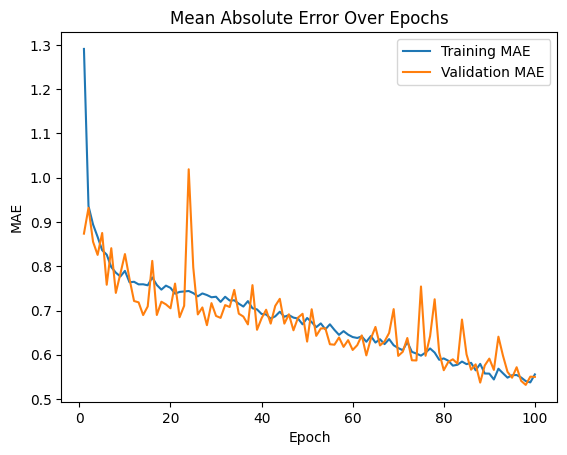

In [58]:
# Plot Mean Absolute Error (MAE) over epochs
plt.plot(range(1, 101), result['mean_absolute_error'], label='Training MAE')
plt.plot(range(1, 101), result['val_mean_absolute_error'], label='Validation MAE')

plt.title('Mean Absolute Error Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

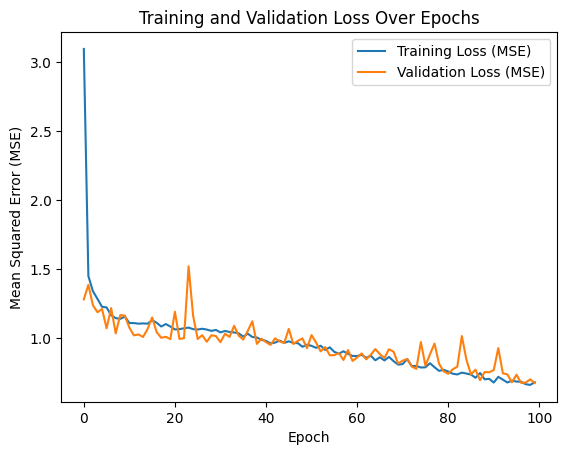

In [60]:
# Plot the training and validation loss

plt.plot(data.history['loss'], label='Training Loss (MSE)')
plt.plot(data.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.show()

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


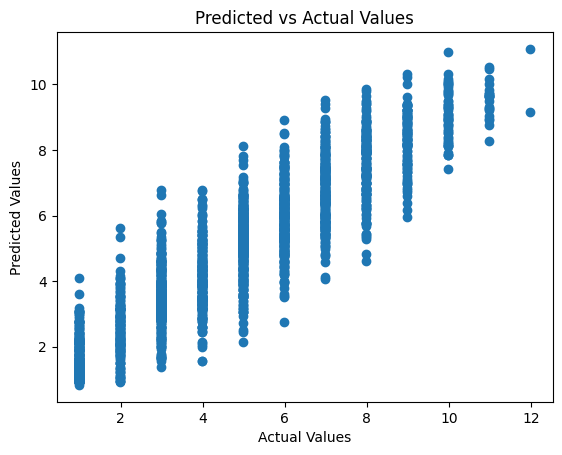

In [61]:
# Get predictions for the test set
y_pred = model1.predict(x_test)

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred)
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [62]:
# Get predictions for the test set
y_pred = model1.predict(x_test)

# If y_test is a pandas Series, convert it to a NumPy array
if isinstance(y_test, pd.Series):
    y_test = y_test.values

# Flatten y_pred if it's a 2D array
y_pred = y_pred.flatten()

# Calculate residuals (errors)
residuals = y_test - y_pred

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


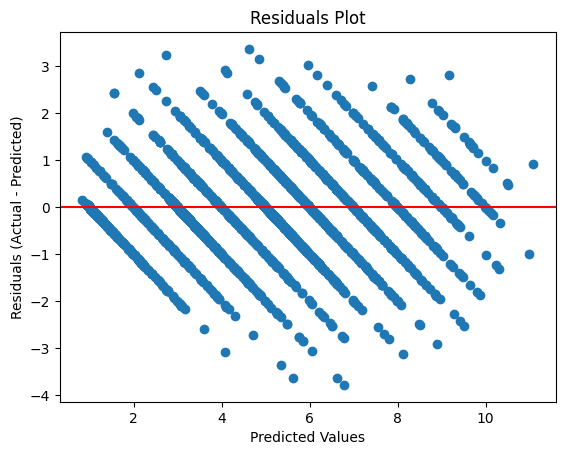

In [64]:
# Plot residuals
plt.scatter(y_pred, residuals)
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
#plt.axhline(y=1, color='r', linestyle='-')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

In [65]:
model1.save("DL_Algo.h5")

In [66]:
new_model = load_model("DL_Algo.h5")

In [67]:
first_row = x_test.iloc[0].to_numpy()

In [68]:
first_row

array([  0.99, 160.  ,  10.99,   4.  ,  11.  ,   1.  ,   6.  ])

In [69]:
for x in first_row:
    print(type(x))

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


In [70]:
new_model.predict(np.array([first_row]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


array([[2.8661718]], dtype=float32)

In [71]:
x_test.columns

Index(['rental_rate', 'length', 'replacement_cost', 'rating', 'category',
       'active', 'rental_actual_duration'],
      dtype='object')